In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Leitura dos dados coletados e formação do DataFrame


In [3]:
df_info_dados = pd.read_csv('../ProjetoRedes/assets/vava.csv', index_col=False)
df_info_dados.head()

,No.,Time,Source,Destination,Protocol,Length,Info,DELTA
0,1,0.000000,192.168.0.103,172.65.250.49,TLSv1.2,84,Application Data,0.000000
1,2,0.031423,104.18.18.119,192.168.0.103,TLSv1.2,1445,Application Data,0.031423
2,3,0.031423,104.18.18.119,192.168.0.103,TLSv1.2,223,Application Data,0.000000
3,4,0.031423,104.18.18.119,192.168.0.103,TLSv1.2,81,Application Data,0.000000
4,5,0.031489,192.168.0.103,104.18.18.119,TCP,54,54910 > 443 [ACK] Seq=1 Ack=1588 Win=514 Len=0,0.000066


In [4]:
df_info_dados_minimized = df_info_dados[df_info_dados['Time'] <= 240]
# 659 até 779

In [5]:
df_info_dados_minimized.head()

,No.,Time,Source,Destination,Protocol,Length,Info,DELTA
0,1,0.000000,192.168.0.103,172.65.250.49,TLSv1.2,84,Application Data,0.000000
1,2,0.031423,104.18.18.119,192.168.0.103,TLSv1.2,1445,Application Data,0.031423
2,3,0.031423,104.18.18.119,192.168.0.103,TLSv1.2,223,Application Data,0.000000
3,4,0.031423,104.18.18.119,192.168.0.103,TLSv1.2,81,Application Data,0.000000
4,5,0.031489,192.168.0.103,104.18.18.119,TCP,54,54910 > 443 [ACK] Seq=1 Ack=1588 Win=514 Len=0,0.000066


In [6]:
df_info_dados_minimized['Protocol'].value_counts()

UDP        19539
TCP         1288
MDNS         863
TLSv1.2      421
ARP          242
TLSv1.3      171
SSDP          55
BJNP          15
IGMPv2        14
DNS           12
THRIFT         3
SSL            2
Name: Protocol, dtype: int64

In [7]:
df_info_dados_minimized.shape

(22625, 8)

In [8]:
df_info_dados_minimized.isnull().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
DELTA          0
dtype: int64

In [9]:
client_length_pkgs = list(df_info_dados_minimized[df_info_dados_minimized['Source'] == '192.168.0.103']['Length'])
client_time_pkgs = list(df_info_dados_minimized[df_info_dados_minimized['Source'] == '192.168.0.103']['Time'])

In [10]:
server_to_client_length_pkgs = list(df_info_dados_minimized[df_info_dados_minimized['Destination'] == '192.168.0.103']['Length'])
server_to_client_time_pkgs = list(df_info_dados_minimized[df_info_dados_minimized['Destination'] == '192.168.0.103']['Time'])

In [11]:
len(client_length_pkgs)

10513

Plot por tipos de Protocolos 

In [12]:
def linear_space_transformer(space_x, space_y, slide_win):
  acc_time = 0
  acc_length = 0
  slide_pointer = slide_win
  new_linear_time_space = []
  new_linear_length_space = []
  
  counter = 0
  for i in range(len(space_x)):
    if space_x[i] > slide_pointer:
      new_linear_time_space.append(acc_time / counter)
      new_linear_length_space.append(acc_length / counter)
      slide_pointer = space_x[i] + slide_win
      acc_time = 0
      acc_length = 0
      counter = 0
    acc_time += space_x[i]
    acc_length += space_y[i]
    counter += 1
  
  new_linear_time_space.append(space_x[-1])
  new_linear_length_space.append(space_y[-1])
  
  return new_linear_time_space, new_linear_length_space

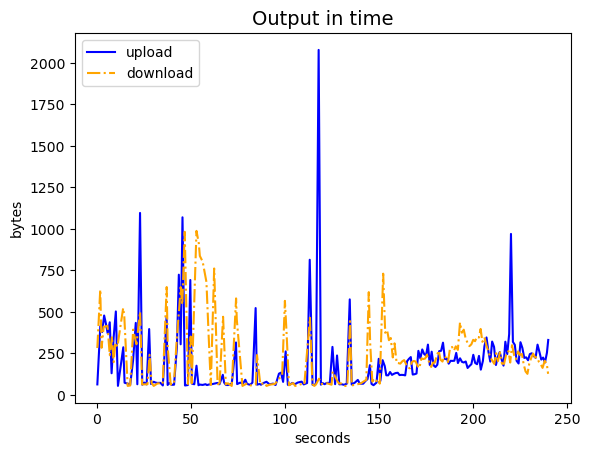

In [13]:
x_inicial, y_inicial = linear_space_transformer(client_time_pkgs, client_length_pkgs, 1)

plt.plot(x_inicial, y_inicial, color='b', label='upload')

x_final, y_final = linear_space_transformer(server_to_client_time_pkgs, server_to_client_length_pkgs, 1)

plt.plot(x_final, y_final, '-.', color = "orange", label="download")
plt.legend(loc="upper left")
plt.xlabel("seconds") 
plt.ylabel("bytes") 
plt.title('Output in time', fontdict={'fontsize': 14}) 
plt.show() 

In [14]:
def ecdf(data):
   
  """
  this function creates the x and y axis 
  for the Emperical Culmulative Distribution Function 
  """
  xaxis = np.sort(data)
  yaxis = np.arange(1, len(data) + 1) / len(data)
  
  return xaxis, yaxis

In [15]:
x_download, y_download = ecdf(df_info_dados_minimized[df_info_dados_minimized['Destination'] == '192.168.0.103']['Length'])
x_upload, y_upload = ecdf(df_info_dados_minimized[df_info_dados_minimized['Source'] == '192.168.0.103']['Length'])

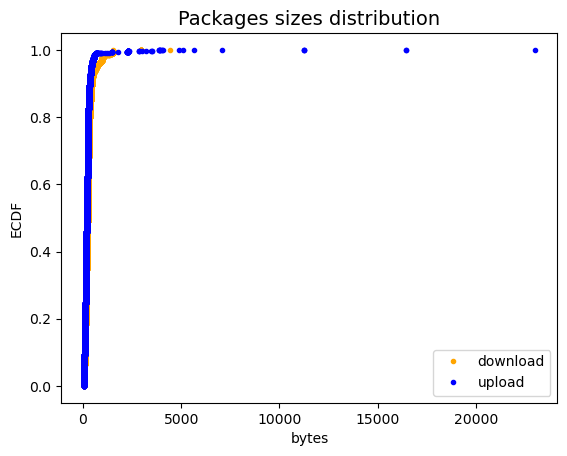

In [16]:
plt.plot(x_download, y_download, linestyle="none", marker=".", color = "orange", label="download")
plt.plot(x_upload, y_upload, linestyle="none", marker=".", color = "blue", label="upload")
plt.title("Packages sizes distribution",  fontdict={'fontsize': 14})
plt.xlabel("bytes")
plt.ylabel("ECDF")
plt.legend(loc="lower right")
plt.show()

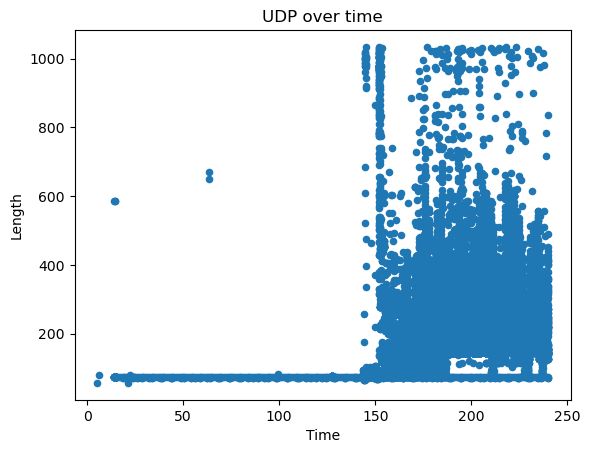

In [17]:
df_info_dados_minimized[df_info_dados_minimized['Protocol'] == 'UDP'].plot(kind='scatter', x='Time', y='Length', title='UDP over time')

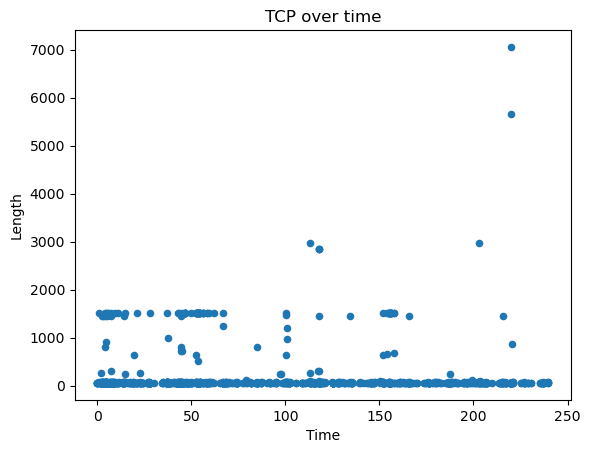

In [18]:
df_info_dados_minimized[df_info_dados_minimized['Protocol'] == 'TCP'].plot(kind='scatter', x='Time', y='Length', title='TCP over time')

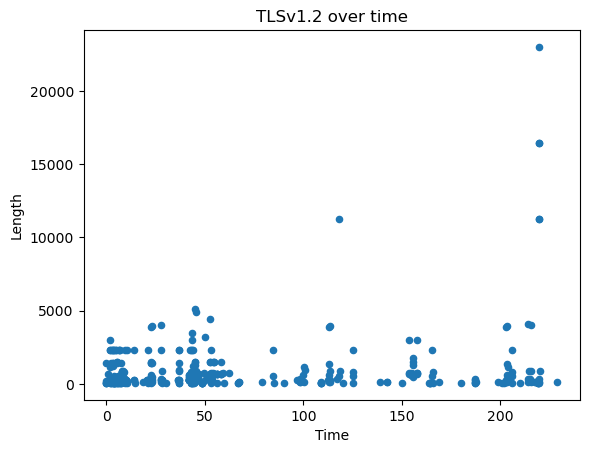

In [19]:
df_info_dados_minimized[df_info_dados_minimized['Protocol'] == 'TLSv1.2'].plot(kind='scatter', x='Time', y='Length', title='TLSv1.2 over time')

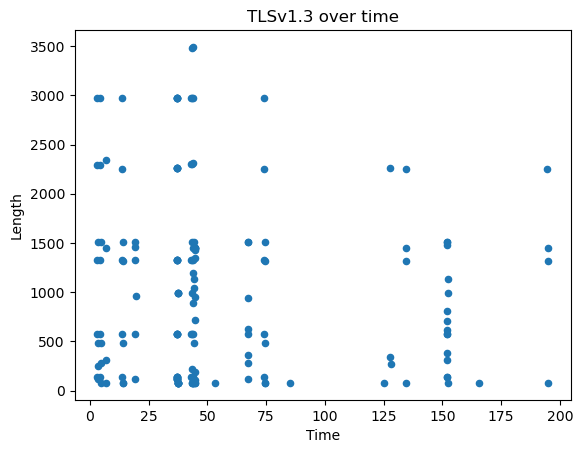

In [20]:
df_info_dados_minimized[df_info_dados_minimized['Protocol'] == 'TLSv1.3'].plot(kind='scatter', x='Time', y='Length', title='TLSv1.3 over time')

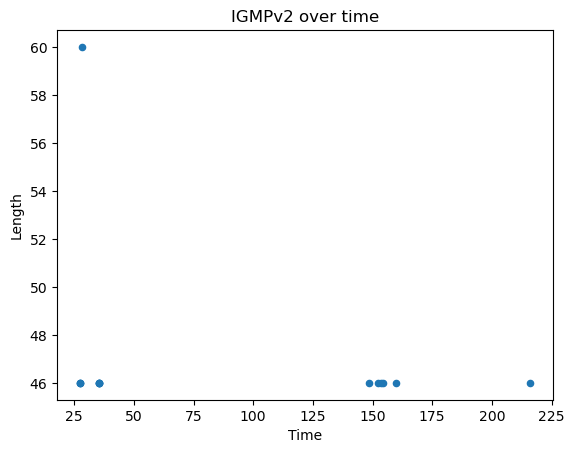

In [21]:
df_info_dados_minimized[df_info_dados_minimized['Protocol'] == 'IGMPv2'].plot(kind='scatter', x='Time', y='Length', title='IGMPv2 over time')

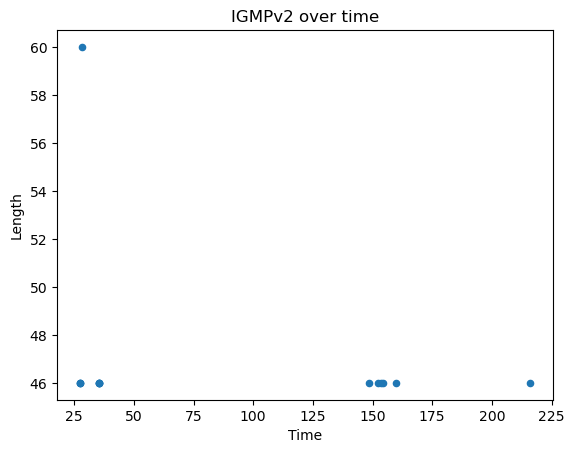

In [22]:
df_info_dados_minimized[df_info_dados_minimized['Protocol'] == 'IGMPv2'].plot(kind='scatter', x='Time', y='Length', title='IGMPv2 over time')

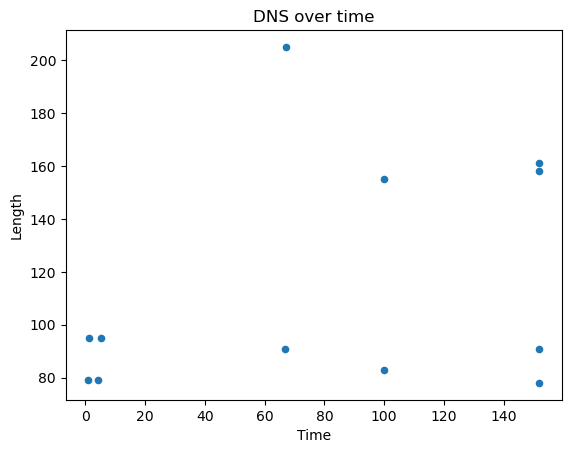

In [23]:
df_info_dados_minimized[df_info_dados_minimized['Protocol'] == 'DNS'].plot(kind='scatter', x='Time', y='Length', title='DNS over time')

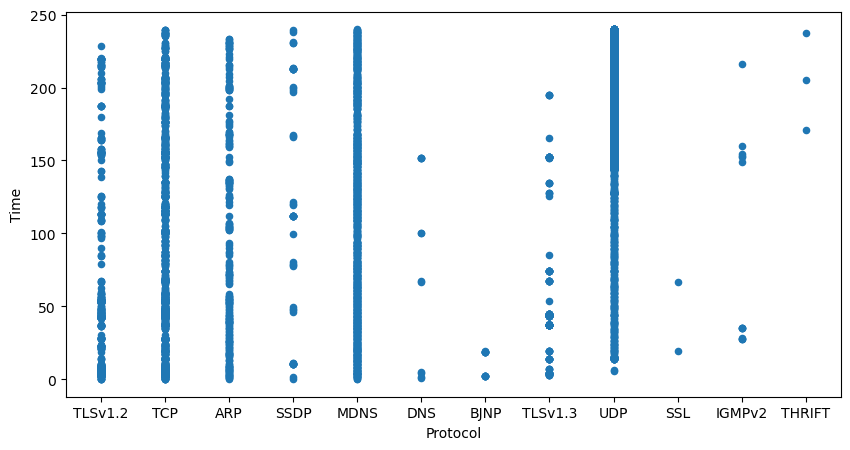

In [24]:
df_info_dados_minimized.plot.scatter(x='Protocol', y='Time', figsize=(10,5))

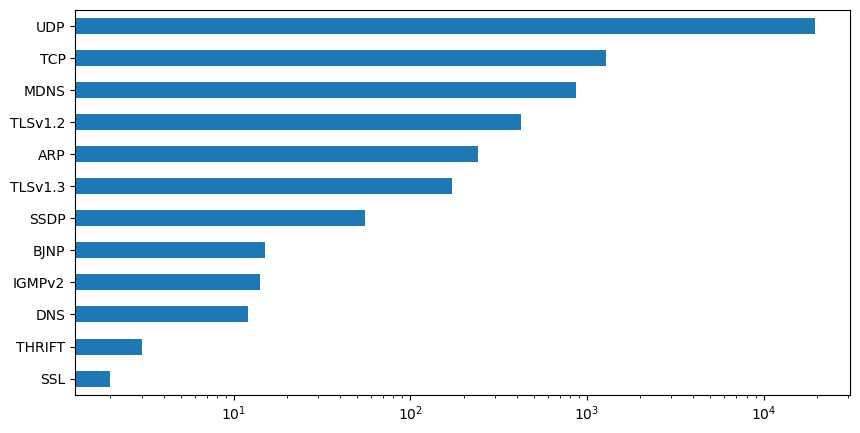

In [25]:
df_info_dados_minimized['Protocol'].value_counts().sort_values().plot(kind='barh', figsize=(10,5))
plt.xscale('log')